In [2]:
import pandas as pd
import numpy as np

data = pd.Series(
    [1, 2, 4, np.nan, 16, 32, np.nan, np.nan, 256]
)

In [3]:
data

0      1.0
1      2.0
2      4.0
3      NaN
4     16.0
5     32.0
6      NaN
7      NaN
8    256.0
dtype: float64

In [5]:
data.interpolate("nearest")

0      1.0
1      2.0
2      4.0
3      4.0
4     16.0
5     32.0
6     32.0
7    256.0
8    256.0
dtype: float64

<AxesSubplot:>

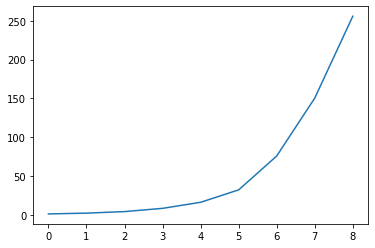

In [7]:
data.interpolate("quadratic").plot()

In [10]:
euribor = pd.read_csv(
    "https://datahub.io/core/euribor/r/euribor-12m-monthly.csv",
    index_col="date",
    parse_dates=["date"]
)

sp500 = pd.read_csv(
    "https://datahub.io/core/s-and-p-500/r/data.csv",
    index_col="Date",
    parse_dates=["Date"],
)

In [11]:
sp500

,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
Date,,,,,,,,,
1871-01-01,4.44,0.26,0.40,12.46,5.32,89.00,5.21,8.02,NaN
1871-02-01,4.50,0.26,0.40,12.84,5.32,87.53,5.06,7.78,NaN
1871-03-01,4.61,0.26,0.40,13.03,5.33,88.36,4.98,7.67,NaN
1871-04-01,4.74,0.26,0.40,12.56,5.33,94.29,5.17,7.96,NaN
1871-05-01,4.86,0.26,0.40,12.27,5.33,98.93,5.29,8.14,NaN
...,...,...,...,...,...,...,...,...,...
2017-12-01,2664.34,48.93,109.88,246.52,2.40,2700.13,49.59,111.36,32.09
2018-01-01,2789.80,49.29,NaN,247.87,2.58,2811.96,49.68,NaN,33.31
2018-02-01,2705.16,49.64,NaN,248.99,2.86,2714.34,49.81,NaN,32.12


In [25]:
interest = pd.DataFrame({
    "us": sp500["Long Interest Rate"],
    "eu": euribor["rate"]
})

interest["eu"] = interest["eu"].interpolate("slinear")
interest = interest.dropna()

In [27]:
interest["diff"] = interest["us"] - interest["eu"]

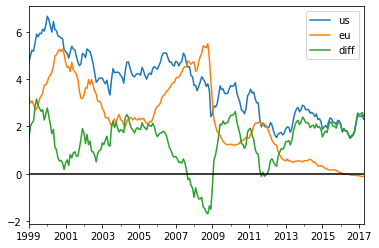

In [34]:
interest.plot()
import matplotlib.pyplot as plt
plt.axhline(0, color="k");